In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Social_Network_Ads.csv")

print(data)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [ ]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
X = data.iloc[:,[2,3]].values
y = data.iloc[:,-1:].values
print(X.shape)
print(y.shape)

(400, 2)
(400, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320, 1)
(80, 1)


In [ ]:
X_max = X_train.max(axis = 0, keepdims = True)
X_min = X_train.min(axis = 0, keepdims = True)
X_train = (X_train - X_min)/(X_max - X_min)
X_test_sacled = (X_test - X_min)/(X_max - X_min)

In [ ]:
#sigmoid function
g = lambda z : np.exp(z) /( 1 + np.exp(z))

def predict_prob(X,w):
  z = np.dot(X,w.T)
  return g(z)

def predict(X,w):
  y_hat = predict_prob(X,w)
  y_hat[y_hat >= 0.5] = 1
  y_hat[y_hat < 0.5] = 0
  return y_hat

In [ ]:
# loss function
def loss(X,y,w):
  y_hat = predict_prob(X,w)
  l = y*np.log(y_hat) + (1-y)*np.log(1-y_hat)
  return -np.mean(l)

In [ ]:
#gradient
def grad(X,y,w):
  y_hat = predict_prob(X,w)
  delta = y_hat - y
  dw = np.dot(X.T,delta)
  return dw.T


In [ ]:
def gradient_desscent(X,y,lr = 0.02,epochs = 1000):
  w = np.zeros((1,X.shape[1]))
  losses = []
  for i in range(epochs):
   dw = grad(X,y,w)
   w  -= lr*dw
   losses.append(loss(X,y,w))
  return losses,w


BT1:Dự đoán khả năng mua hàng trên tập test và so sánh dự báo với giá trị thực tế bằng các thước đo ACCURACY,RECALL,PRECISION.


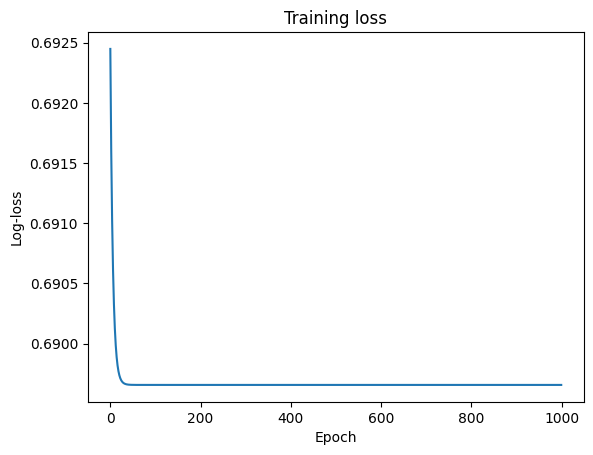

Accuracy : 0.65
Precision: 0.5
Recall   : 0.5714285714285714


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

losses, w = gradient_desscent(X_train, y_train, lr=0.02, epochs=1000)

plt.plot(losses)
plt.xlabel("Epoch"); plt.ylabel("Log‑loss"); plt.title("Training loss"); plt.show()


y_pred = predict(X_test_sacled, w).ravel().astype(int)   # chuyển thành 1‑D vector int
y_true = y_test.ravel().astype(int)

# 3) Tính các thước đo
print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))


BT2Viết lại mã Python cho mô hình hồi quy logistic dưới dạng một lớp (class) tên LogisticRegression1.


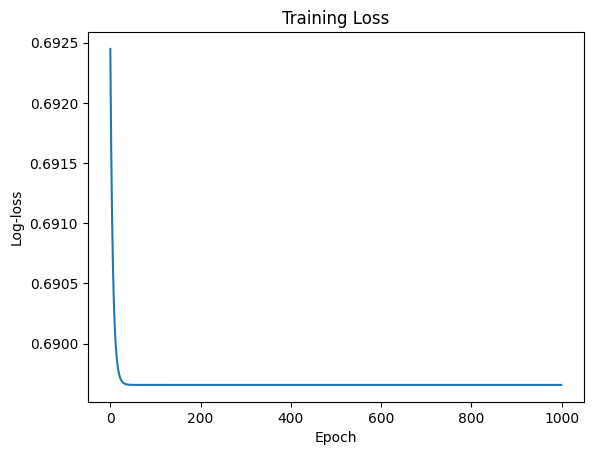

Accuracy : 0.65
Precision: 0.5
Recall   : 0.5714285714285714


In [ ]:
import numpy as np

class LogisticRegression1:
    def __init__(self, lr=0.02, epochs=5000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.losses = []
        self.X_min = None
        self.X_max = None

    def _sigmoid(self, z):
        return np.exp(z) / (1 + np.exp(z))

    def predict_prob(self, X):
        z = np.dot(X, self.w.T)  # w: (1,n), X: (m,n)
        return self._sigmoid(z)

    def predict(self, X):
        y_hat = self.predict_prob(X)
        y_hat[y_hat >= 0.5] = 1
        y_hat[y_hat < 0.5] = 0
        return y_hat.astype(int)

    def loss(self, X, y):
        y_hat = self.predict_prob(X)
        eps = 1e-15
        l = y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps)
        return -np.mean(l)

    def grad(self, X, y):
        y_hat = self.predict_prob(X)
        delta = y_hat - y
        dw = np.dot(X.T, delta)   # shape (n,1)
        return dw.T  # để cộng được với w: (1,n)

    def fit(self, X_train, y_train):
        # Min-max scale
        self.X_min = X_train.min(axis=0, keepdims=True)
        self.X_max = X_train.max(axis=0, keepdims=True)
        X_scaled = (X_train - self.X_min) / (self.X_max - self.X_min + 1e-8)

        y = y_train.reshape(-1, 1)
        self.w = np.zeros((1, X_scaled.shape[1]))  # shape (1,n)

        for _ in range(self.epochs):
            dw = self.grad(X_scaled, y)
            self.w -= self.lr * dw
            self.losses.append(self.loss(X_scaled, y))

    def predict_scaled(self, X, X_min, X_max):
        X_scaled = (X - X_min) / (X_max - X_min + 1e-8)
        return self.predict(X_scaled)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load dữ liệu
data = pd.read_csv("Social_Network_Ads.csv")
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1:].values

# Tách tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện
model = LogisticRegression1(lr=0.02, epochs=1000)
model.fit(X_train, y_train)

# Vẽ log-loss
plt.plot(model.losses)
plt.xlabel("Epoch");
plt.ylabel("Log-loss");
plt.title("Training Loss");
plt.show()

# Dự đoán
y_pred = model.predict_scaled(X_test, model.X_min, model.X_max).ravel()
y_true = y_test.ravel()

# Đánh giá
print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))


Bài 3 : thêm bias và đánh giá mô hình


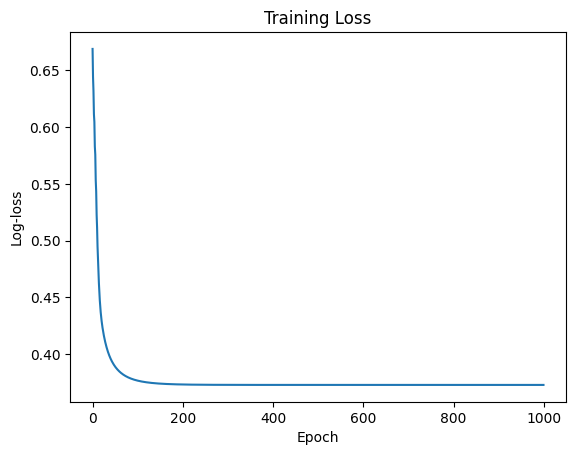

Accuracy : 0.8875
Precision: 0.9130434782608695
Recall   : 0.75


In [ ]:
import numpy as np

class LogisticRegression1:
    def __init__(self, lr=0.02, epochs=5000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.losses = []
        self.X_min = None
        self.X_max = None

    def _sigmoid(self, z):
        return np.exp(z) / (1 + np.exp(z))

    def predict_prob(self, X):
        z = np.dot(X, self.w.T)
        return self._sigmoid(z)

    def predict(self, X):
        y_hat = self.predict_prob(X)
        y_hat[y_hat >= 0.5] = 1
        y_hat[y_hat <  0.5] = 0
        return y_hat.astype(int)

    def loss(self, X, y):
        y_hat = self.predict_prob(X)
        eps = 1e-15
        l = y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps)
        return -np.mean(l)

    def grad(self, X, y):
        y_hat = self.predict_prob(X)
        delta = y_hat - y
        dw = np.dot(X.T, delta)
        return dw.T

    def fit(self, X_train, y_train):
        self.X_min = X_train.min(axis=0, keepdims=True)
        self.X_max = X_train.max(axis=0, keepdims=True)
        X_scaled = (X_train - self.X_min) / (self.X_max - self.X_min + 1e-8)

        # Thêm cột bias
        X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

        y = y_train.reshape(-1, 1)
        self.w = np.zeros((1, X_scaled.shape[1]))

        for _ in range(self.epochs):
            dw = self.grad(X_scaled, y)
            self.w -= self.lr * dw
            self.losses.append(self.loss(X_scaled, y))

    def predict_scaled(self, X, X_min, X_max):
        X_scaled = (X - X_min) / (X_max - X_min + 1e-8)
        # Thêm cột bias
        X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

        return self.predict(X_scaled)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load dữ liệu
data = pd.read_csv("Social_Network_Ads.csv")
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1:].values

# Tách tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện
model = LogisticRegression1(lr=0.02, epochs=1000)
model.fit(X_train, y_train)

# Vẽ log-loss
plt.plot(model.losses)
plt.xlabel("Epoch");
plt.ylabel("Log-loss");
plt.title("Training Loss");
plt.show()

# Dự đoán
y_pred = model.predict_scaled(X_test, model.X_min, model.X_max).ravel()
y_true = y_test.ravel()

# Đánh giá
print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))
